# Sprachgenerierung

Auch in dieser Woche beschäftigen wir uns mit Twitter-Daten. Diesmal geht es jedoch nicht um Sentiment Analysis, sondern wir wollen ein Modell trainieren, das es uns erlaubt, Tweets in einem bestimmten Stil zu generieren.

Als Datengrundlage dienen uns Daten von http://www.trumptwitterarchive.com. Brendan Brown, der Betreiber der Seite hat sämtliche Tweets von Donald Trump seit Mai 2009 zusammengetragen. Da wir die Sprache des US-Präsidenten modellieren wollen, verwenden wir nur dessen eigene und keine Retweets.

Unser Modell wird auf der Ebene von Einzelzeichen arbeiten, zunächst wollen wir uns aber auf einer höheren Ebene einen Überblick über den Datensatz verschaffen.

## 1. Aufgabe: Überblick über den Datensatz
### 1.1 Datensatz einlesen
Lest den in der Datei ```all_tweets.json``` enthaltenen Datensatz in einen Pandas-Dataframe mit folgenden Spalten ein: ```created_at```, ```id```, ```text```. Die übrigen im JSON enthaltenen Felder können ignoriert werden.



In [1]:
import pandas as pd
import json

input_file = 'all_tweets.json'
tweets = pd.read_json(input_file)

In [2]:
tweets = tweets.drop(['favorite_count', 'is_retweet', 'retweet_count', 'source'], axis=1)

# tweets

### 1.2 Jahr hinzufügen
Für unsere Auswertungen interessiert uns nur das Jahr, in dem der Tweet verfasst wurde, nicht das genaue Datum. Wir fügen daher dem Dataframe eine zusätzliche Spalte ```year``` hinzu und verwenden die Pandas-Funktion ```DatetimeIndex```, um aus dem String einen DatetimeIndex zu machen, auf dessen einzelne Felder (```year```, ```month```, ```day```, ...) dann mittels Punktoperator zugegriffen werden kann.

In [3]:
tweets['year'] = pd.DatetimeIndex(tweets['created_at']).year
# tweets

### 1.3 Textlänge analysieren
Naturgemäß gibt es bei Tweets nur eine begrenzte Varianz, was die Textlänge angeht. Wir wollen uns dennoch anschauen, wie sich die Textlänge im Laufe der Jahre entwickelt hat.
Dazu fügen wir unserem Dataframe zunächst eine Spalte ```text_length``` hinzu, in der wir festhalten, welche Länge der jeweilige Tweet-Text hat.

**Hinweis**
Mittels ```apply``` lassen sich Funktionen auf Spalten des Dataframes mappen: ```df['new'] = df['old'].apply(lambda x : fancy_stuff(x))```

In [4]:
tweets['text_length'] = tweets['text'].apply(lambda x: len(x))
# tweets

Für einen groben Überblick schauen wir uns einige Kennzahlen zur Textlänge an. Dazu gruppieren wir nach ```year```und nutzen dann die ```describe```-Methode des Dataframes, wobei wir nur Spalten vom Typ ```numpy.number``` betrachten und daher der ```describe```-Methode eine entsprechende ```include```-Liste mitgeben.

In [5]:
import numpy as np

tweets_grouped = tweets.groupby(['year']).describe(include=[np.number])

tweets_grouped


id_str                                                          \
       count          mean           std           min           25%   
year                                                                   
2009    56.0  2.896500e+09  1.386292e+09  1.698309e+09  1.863037e+09   
2010   142.0  1.440030e+15  4.090839e+15  7.677152e+09  1.318076e+10   
2011   774.0  1.163851e+17  2.985790e+16  2.521253e+16  1.009352e+17   
2012  3530.0  2.338664e+17  3.690381e+16  1.542710e+17  2.047411e+17   
2013  5775.0  3.391614e+17  3.727767e+16  2.861273e+17  3.063865e+17   
2014  2433.0  4.880322e+17  3.704741e+16  4.183651e+17  4.573088e+17   
2015  3057.0  6.229778e+17  3.891979e+16  5.505476e+17  5.919861e+17   
2016  3465.0  7.438493e+17  3.707584e+16  6.827240e+17  7.087148e+17   
2017  2284.0  8.865922e+17  3.796267e+16  8.154223e+17  8.560855e+17   
2018  3104.0  1.020171e+18  3.587214e+16  9.478026e+17  9.928010e+17   
2019  1075.0  1.102251e+18  1.272214e+16  1.079900e+18  1.090609e+18   

                                               text_length              \
               50%           75%           max       count        mean   
year                                                                     
2009  2.280281e+09  3.462656e+09  6.971080e+09        56.0  112.214286   
2010  1.753370e+10  2.455505e+10  2.059549e+16       142.0  122.528169   
2011  1.214507e+17  1.416105e+17  1.528272e+17       774.0  107.739018   
2012  2.456090e+17  2.636903e+17  2.847717e+17      3530.0  106.975921   
2013  3.300694e+17  3.699051e+17  4.181450e+17      5775.0   86.123983   
2014  4.893819e+17  5.208777e+17  5.503998e+17      2433.0  114.132758   
2015  6.235615e+17  6.582454e+17  6.827032e+17      3057.0  109.009486   
2016  7.452963e+17  7.779584e+17  8.152709e+17      3465.0  113.363925   
2017  8.906965e+17  9.189161e+17  9.476141e+17      2284.0  133.917688   
2018  1.023553e+18  1.051105e+18  1.079888e+18      3104.0  198.084407   
2019  1.103036e+18  1.113900e+18  1.122486e+18      1075.0  183.999070   

                                                     
            std   min     25%    50%     75%    max  
year                                                 
2009  20.056932  62.0  103.75  115.0  126.25  140.0  
2010  21.394536  45.0  111.00  132.5  138.00  140.0  
2011  27.061936  38.0   86.00  114.0  133.00  140.0  
2012  32.147123  12.0   87.00  117.0  135.00  148.0  
2013  43.081747   9.0   41.00   94.0  128.00  152.0  
2014  27.615667  21.0   98.00  124.0  136.00  148.0  
2015  31.873999  15.0   87.00  120.0  137.00  155.0  
2016  30.697098  14.0   93.00  127.0  138.00  148.0  
2017  46.279751   2.0  119.00  138.0  143.00  320.0  
2018  83.564703   8.0  131.00  221.0  277.00  315.0  
2019  92.820761   5.0  102.50  205.0  276.00  302.0

### 1.4. Top-Hashtags und -Mentions
Nachdem wir uns mit der Länge der Texte beschäftigt haben, wollen wir nun herausfinden, wen Donald Trump in seinen Tweets erwähnt und welche Themen er (hash)taggt. Dabei interessiert uns die Entwicklung über die Jahre.

Wir beginnen mit den Hashtags und verwenden zunächst einen kleinen Trick, um ein Dictionary zu erstellen, das für jedes Jahr einen "Sub-Dataframe" enthält. 

Aus diesen Dataframes extrahieren wir dann pro Jahr alle Tweettexte in Form eines einzelnen Strings. Dazu konkatenieren wir die ```text```-Felder der Dataframes per ```' '.join(frame['text']) for frame in ...```

Damit haben wir ein Dictionary, das pro Jahr alle konkatenierten Tweet-Texte enthält, aus denen wir dann die Hashtags extrahieren können. 
Hierbei machen wir uns noch keine allzu großen Gedanken über Normalisierung, sondern zerlegen die langen Texte einfach per ```split()``` in einzelne Tokens, aus denen wir dann die Hashtags herausfiltern. 
Um die Top-Hashtags in Erfahrung zu bringen, verwenden wir wieder ```Counter```.

In [6]:
from collections import Counter
tweets_by_year = dict(list(tweets.groupby(['year'])))

In [7]:
tweets_in_year_dict = {}

for year in tweets_by_year:
    tweets_in_year = ' '.join(tweets_by_year[year]['text'])
    tweets_in_year_dict[year] = tweets_in_year

In [8]:
hashtags_in_year_dict = {}

for year in tweets_in_year_dict:
    tl = tweets_in_year_dict[year].split()
    hashtag_list = list(filter(lambda x: '#' in x, tl))
    hashtags_in_year_dict[year] = hashtag_list

In [9]:
from collections import Counter
top_hashtags_in_year_dict = {}

for year in hashtags_in_year_dict:
    hashtag_count = Counter(hashtags_in_year_dict[year])
    top_hashtags_in_year_dict[year] = hashtag_count.most_common(20)
#     print("\n\n",top_hashtags_in_year_dict[year])
    

Als nächstes interessieren uns die Mentions. Wir können hier analog zu den Hashtags vorgehen.

In [10]:
top_mentions_per_year = {}

for year in tweets_in_year_dict:
    tl = tweets_in_year_dict[year].split()
    mention_list = list(filter(lambda x: '@' in x, tl))
    mention_count = Counter(mention_list)
    top_mentions_per_year[year] = mention_count.most_common(20)

# top_mentions_per_year

### 1.5 Vokabular
Bevor wir endgültig auf die Ebene der Einzelzeichen herabsteigen, wollen wir uns das von Trump verwendete Vokabular genauer ansehen und dabei auch herausfinden, ob weitere Vorverarbeitungsschritte nötig sind.

Dazu erstellen wir uns zunächst eine Liste aller Tokens, die in den Dokumenten vorkommen. Wir gruppieren nicht mehr per Jahr, sondern gehen ganz simpel vor und konkatenieren alle Tweet-Texte in einen langen String, den wir dann in einzelne Terme splitten.

Gebt die 20 häufigsten Terme aus. Was fällt auf (insbesondere bei Betrachtung des hinteren Endes der Liste)?

In [11]:
tweet_texts = ' '.join(tweets['text'])

tokens = tweet_texts.split();

token_count = Counter(tokens)

print(token_count.most_common(20))

print(tokens[0:17])


[('the', 17252), ('to', 11653), ('and', 9303), ('of', 8246), ('a', 7975), ('is', 7535), ('in', 6777), ('for', 5067), ('I', 4861), ('on', 4842), ('be', 4023), ('will', 3761), ('that', 3217), ('are', 3177), ('with', 2980), ('you', 2963), ('at', 2800), ('&amp;', 2764), ('The', 2759), ('have', 2546)]
['Will', 'be', 'interviewed', 'by', '@MariaBartiromo', 'on', '@FoxNews', 'at', '10:00', 'AM.', 'Talking', 'about', 'the', 'Southern', 'Border', 'and', 'how']


Welche Nachbarbeitungsschritte könnten im Hinblick auf die spätere Verarbeitung einzelner Zeichen sinnvoll sein?

In [12]:
import html

cleaned_tweet_texts  = html.unescape(tweet_texts)


#### Exkursion: SpaCy

[```spaCy```](https://spacy.io/) ist eine recht verbreitete Bibliothek im Bereich NLP. Um damit erste Erfahrungen zu sammeln, tokenisieren wir unsere Texte unter Verwendung des ```nlp```-Objekts erneut und filtern alle Satzzeichen und Stopwörter aus. Aus Performancegründen verarbeiten wir die Texte nacheinander und nicht den konkatenierten Gesamttext.

Was fällt bei der Betrachtung der Top Tokens auf?

**Hinweise**
1. Benutzung von ```spaCy```:
    * Mittels des ```nlp```-Objekts lassen sich aus Strings Dokumente erzeugen, die Tokens beinhalten.
    * ```spaCy``` versieht die Tokens mit zusätzlichen Informationen zum Beispiel darüber, ob es sich bei dem Token um ein Stopwort oder ein Satzzeichen handelt (https://spacy.io/api/token). Wenn wir nur am Text interessiert sind, können wir auf diesen mittels ```token.text``` zugreifen. Ob es sich um ein Stopwort handelt, verrät ```token.is_stop```, ```token.is_punct``` gibt zurück, ob es sich bei dem entsprechenden Token um ein Satzzeichen handelt.
2. Aufwand: Beim Betrachten der Top 20 Tokens sollte deutlich werden, dass auch der Rückgriff auf "Out-of-the-box"-Lösungen nicht heißt, dass Nachdenken unnötig wird. Wir wollen das aber an dieser Stelle nicht weiter vertiefen, weil wir ohnehin auf Zeichenebene arbeiten wollen.

In [13]:
import spacy

nlp = spacy.load('en', disable=['ner', 'tagger', 'parser', 'textcat'])
tweet_list = list(tweets['text'])
nlp_docs = # TODO Liste von spaCy docs aus Liste der Tweets erstellen
nlp_annotated_tokens = # TODO Liste von spaCy tokens aus Liste der Dokumente erstellen
nlp_tokens = # TODO (gefilterte) Liste von Strings erstellen
# TODO Top 20 Terme ausgeben

SyntaxError: invalid syntax (<ipython-input-13-e152eb17d156>, line 5)

### 1.6 Verwendete Zeichen
Zum Ende unserer Analysephase schauen wir uns noch an, welche Einzelzeichen in den Tweets vorkommen. Dazu greifen wir wieder auf die konkatenierten (und bereinigten) Tweettexte zurück, die in der Variable ```cleaned_tweet_texts``` gespeichert sind.
Wie viele Zeichen gibt es und wie häufig werden sie verwendet?

In [14]:
# Liste aller verwendeten Zeichen inklusive Duplikate (String => Liste)
tweet_chars = list(cleaned_tweet_texts)
# Wie oft wird welches Zeichen verwendet?
cleaned_tweet_stats = Counter(tweet_chars)
# Welche Zeichen kommen vor?
cleaned_tweet_chars = cleaned_tweet_stats.keys()

least_common_chars_touple = cleaned_tweet_stats.most_common()[-107:-1]

least_common_chars = list(np.array(least_common_chars_touple)[:,0])


### 1.7 Vom Text zur Zeichenliste
Betrachten Sie die in der vorherigen Teilaufgabe generierte Liste der verwendeten Zeichen. Welche Bereinigungsschritte könnten angemessen sein? Kurze Begründung bitte.

Bevor wir daran gehen, vektorisierte Trainingsdaten für unser Modell zu generieren, wandeln wir unsere Tweets in dieser Teilaufgabe in eine (bereinigte) Liste von Einzelzeichen um und speichern diese in der Variable ```cleaned_tweet_chars```.

```['d', 'i', 'e', 's', ' ', 'i', 's', 't', ' ', 'e', 'i', 'n', ' ', 'b', 'e', 'i', 's', 'p', 'i', 'e', 'l', ',', ' ', 'w', 'i', 'e', ' ', 'd', 'i', 'e', ' ', 'l', 'i', 's', 't', 'e', ' ', 'b', 'e', 'g', 'i', 'n', 'n', 'e', 'n', ' ', 'k', 'ö', 'n', 'n', 't', 'e', '.']```


**Hinweise**: 
* In Python gibt es eine Methode ```str.isprintable()```, die bei der Bereinigung hilfreich sein könnte ...
* Vereinfachung ist legitim. Je mehr Einzelzeichen wir bei der Modellierung berücksichtigen, umso komplexer wird unser Modell und umso höher ist der Trainingsaufwand.

In [15]:
black_list = least_common_chars
# Alle Tweets in Einzelzeichen zerlegt und ggf. bereinigt hier rein
cleaned_tweet_chars = list(filter(lambda x: x not in black_list, tweet_chars))
cleaned_tweet_chars

['W',
 'i',
 'l',
 'l',
 ' ',
 'b',
 'e',
 ' ',
 'i',
 'n',
 't',
 'e',
 'r',
 'v',
 'i',
 'e',
 'w',
 'e',
 'd',
 ' ',
 'b',
 'y',
 ' ',
 '@',
 'M',
 'a',
 'r',
 'i',
 'a',
 'B',
 'a',
 'r',
 't',
 'i',
 'r',
 'o',
 'm',
 'o',
 ' ',
 'o',
 'n',
 ' ',
 '@',
 'F',
 'o',
 'x',
 'N',
 'e',
 'w',
 's',
 ' ',
 'a',
 't',
 ' ',
 '1',
 '0',
 ':',
 '0',
 '0',
 ' ',
 'A',
 'M',
 '.',
 ' ',
 'T',
 'a',
 'l',
 'k',
 'i',
 'n',
 'g',
 ' ',
 'a',
 'b',
 'o',
 'u',
 't',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'S',
 'o',
 'u',
 't',
 'h',
 'e',
 'r',
 'n',
 ' ',
 'B',
 'o',
 'r',
 'd',
 'e',
 'r',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'h',
 'o',
 'w',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'D',
 'e',
 'm',
 's',
 ' ',
 'M',
 'U',
 'S',
 'T',
 ' ',
 'a',
 'c',
 't',
 ' ',
 'f',
 'a',
 's',
 't',
 ' ',
 't',
 'o',
 ' ',
 'c',
 'h',
 'a',
 'n',
 'g',
 'e',
 ' ',
 'o',
 'u',
 'r',
 ' ',
 'p',
 'a',
 't',
 'h',
 'e',
 't',
 'i',
 'c',
 ' ',
 'i',
 'm',
 'm',
 'i',
 'g',
 'r',
 'a',
 't',
 'i',
 'o',
 'n',
 ' ',
 'l',
 'a',
 'w'

## Aufgabe 2
Nachdem wir uns einen Überblick über den Datensatz verschafft und uns für die Zeichen entschieden haben, die wir bei der Modellierung berücksichtigen wollen, geht es nun darum, die Daten so aufzubereiten, dass wir ein Modell trainieren können.

Das Training soll wie folgt ablaufen: Gegeben 30 Zeichen, soll das Modell das 31. Zeichen vorhersagen. Dazu müssen wir die einzelnen Zeichen in Vektorform bringen. Wir wählen dazu ein One-Hot-Encoding und bilden folglich jedes der Einzelzeichen in ```cleaned_tweet_chars``` auf einen Vektor ab, der genau eine 1 enthält.

(Zu) einfaches Beispiel: ```['a', 'b', 'c'] => [(1,0,0), (0,1,0), (0,0,1)]```

### 2.1 Indizes für das One-Hot-Encoding
Um entscheiden zu können, an welcher Stelle wir die 1 setzen, müssen wir jedem Zeichen einen eindeutigen Index zuweisen.
Umgekehrt wollen wir auch zu jedem Index schnell das zugehörige Zeichen ermitteln können. Wir erstellen daher zwei Dictionaries: ```char2index``` für die Abbildung von Zeichen zu Index und ```index2char``` für die umgekehrte Abbildung von Index zu Zeichen.

In [16]:
# Menge aller verwendeten Zeichen nach Bereinigung 
char_set = set(cleaned_tweet_chars)
print('Anzahl Zeichen: {}'.format(len(char_set)))
char2index = {}
index2char = {}
for index, char in enumerate(char_set):
    char2index[char] = index
    index2char[index] = char
# index2char = # TODO Abbildung Index => Zeichen

Anzahl Zeichen: 89


### 2.2 Generiere Trainingsdaten
Wie bereits beschrieben, soll das Modell 30 Zeichen entgegennehmen und das 31. Zeichen vorhersagen. Wir generieren uns Trainingsdaten, indem wir ```sentences``` eine Liste von 30 Zeichen aus ```cleaned_tweet_chars``` hinzufügen, ```next_chars``` das darauf folgende 31. Zeichen und dies alle 4 Zeichen wiederholen.

In [17]:
input_length = 30
step = 4
sentences = []
next_chars = []

for i in range(0, len(cleaned_tweet_chars)-input_length-1, step):
    sentences.append(cleaned_tweet_chars[i:min(i+input_length, len(cleaned_tweet_chars)-1)])
    next_chars.append(cleaned_tweet_chars[min(i+input_length+1, len(cleaned_tweet_chars)-1)])
print('Anzahl Trainingssätze: {}'.format(len(sentences)))

Anzahl Trainingssätze: 779415


### 2.3 Vektorisierung
Nun können wir daran gehen, die Daten zu vektorisieren. Die Eingabe ```x``` enthält für jeden der Trainingssätze in ```sentences``` one-hot-codierte Vektoren der Zeichen, aus denen der jeweilige Satz besteht. 
Die erwartete Ausgabe ```y``` basiert auf ```next_chars``` und enthält für jeden der Trainingssätze einen einzelnen one-hot-codierten Vektor für das als Fortsetzung des Satzes erwartete Zeichen.

Beispiel: Wenn ```sentences``` an Position ```i``` die Sequenz ```['a', 'b', 'c']``` und ```next_chars``` an derselben Stelle ```'d'``` enthält, dann enthält ```x``` bei entsprechender Kodierung an Position ```i``` ```[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0]]``` und ```y``` an der entsprechenden Stelle ```[0, 0, 0, 1]```.

In [18]:
import numpy as np

print('Vektorisierung ...')
x = np.zeros((len(sentences), input_length, len(char_set)), dtype=np.bool)
y = np.zeros((len(sentences), len(char_set)), dtype=np.bool)
print(x)
print(y)

Vektorisierung ...
[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False 

In [19]:
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i][t][char2index[char]] = 1
    y[i][char2index[next_chars[i]]] = 1

In [20]:
print(x[0])
print(y[0])

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False]


### 2.4 Definition des Modells

Für unseren Tweet-Generator werden wir ein recht einfaches Modell trainieren. Wir verwenden wieder die Sequential-API. 

Der erste Layer ist direkt das Herzstück unseres Modells: Der LSTM-Layer. 

Als Anzahl der Units verwenden wir 128.
Welche Dimensionen hat die ```input_shape```? 

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras import metrics

print('Erstelle Model...')
model = Sequential()
model.add(LSTM(128, input_shape=(input_length, len(char_set))))

Using TensorFlow backend.


Erstelle Model...
Instructions for updating:
Colocations handled automatically by placer.


Als Ausgabelayer fügen wir einen Dense-Layer hinzu. Wie müssen wir die Anzahl der Hidden-Units wählen? Wieso ist ```softmax``` eine geeignete Aktivierungsfunktion?

In [22]:
model.add(Dense(len(char_set), activation = 'softmax'))

Als Optimizer wählen wir RMSprop mit einer Learning-Rate von 0.005 und als Loss-Funktion ```categorical_crossentropy```.

Wieso können wir nicht wie im letzten Labor ```binary_crossentropy``` verwenden?

In [23]:
optimizer = RMSprop(lr=0.005)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               111616    
_________________________________________________________________
dense_1 (Dense)              (None, 89)                11481     
Total params: 123,097
Trainable params: 123,097
Non-trainable params: 0
_________________________________________________________________
None


Im Zusammenhang mit LSTMs werden häufig Dropout-Layer erwähnt. Bei Betrachtung der Zusammenfassung unseres Modells fällt auf, dass wir keinen solchen Layer verwenden.

Wozu dienen Dropout-Layer? Warum könnte es in unserem Fall angemessen sein, auf einen solchen Layer zu verzichten?

### 2.5 Training des Models

Nach all den Vorarbeiten können wir nun daran gehen, unser Model zu trainieren.
Um das Model bei Bedarf nicht neu definieren zu müssen, speichern wir uns dessen Struktur als JSON ab.

In [24]:
model_structure = model.to_json()
with open("text_generation_model.json", "w") as json_file:
    json_file.write(model_structure)

Um unsere Trainingsfortschritte nicht zu verlieren, definieren wir uns eine Checkpoint-Funktion, die als Callback aufgerufen wird und den aktuellen Modelzustand abspeichert, solange das Modell besser ist, als das bisher gespeicherte Model. Gespeichert werden soll das komplette Model, nicht nur die Gewichte.

In [25]:
from keras.callbacks import ModelCheckpoint
model_checkpoint = ModelCheckpoint('text_generation.hd5', monitor='acc', save_best_only=True, save_weights_only=False)# TODO nur bestes Model speichern, komplettes Model speichern)

Jetzt wird es ernst. Wir trainieren unser Model. Um in ansehbarer Zeit Ergebnisse zu sehen, führen wir unser Training über 20 Epochen mit eine Batch-Size von 100 durch.

Um die Entwicklung des Models später auswerten zu können, speichern wir uns die History.

In [ ]:
import pickle

epochs = 40
batch_size = 100


model_history = model.fit(x, y, batch_size=batch_size, epochs=epochs, callbacks=[model_checkpoint])

with open("text_generation_history", 'wb') as hist_file:
    pickle.dump(model_history.history, hist_file)
print('History gespeichert.')

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
779415/779415 [==============================] - 173s 223us/step - loss: 2.5832 - acc: 0.3286
Epoch 2/40
779415/779415 [==============================] - 179s 230us/step - loss: 2.3421 - acc: 0.3900
Epoch 3/40
779415/779415 [==============================] - 175s 225us/step - loss: 2.2836 - acc: 0.4046
Epoch 4/40
779415/779415 [==============================] - 175s 225us/step - loss: 2.2535 - acc: 0.4111
Epoch 5/40
779415/779415 [==============================] - 177s 227us/step - loss: 2.2352 - acc: 0.4162
Epoch 6/40
779415/779415 [==============================] - 177s 227us/step - loss: 2.2215 - acc: 0.4199
Epoch 7/40
779415/779415 [==============================] - 176s 226us/step - loss: 2.2104 - acc: 0.4230
Epoch 8/40
779415/779415 [==============================] - 177s 227us/step - loss: 2.2017 - acc: 0.4243
Epoch 9/40
779415/779415 [==============================] - 177s 228us/step - loss: 2.1954 - acc: 0.4262
Epoch 1

## Aufgabe 3
Zum Abschluss wollen wir noch etwas Spaß mit unserem Modell haben. Aus diesem Grund laden wir uns das gespeicherte (bisher) beste Model und verwenden es, um basierend auf einem "Seed" neue Tweets zu generieren.

In [27]:
from keras.models import load_model
loaded_model = load_model('text_generation.hd5')

### Eine kleine Hilfsfunktion
Der Ausgabelayer unseres Models beschreibt eine Wahrscheinlichkeitsverteilung über alle möglichen Ausgabezeichen. Was wir tun wollen, ist anhand dieser Verteilung eine repräsentative Stichprobe zu ziehen. Ähnlich wie bei Markov-Ketten wählen wir als nächstes Zeichen nicht zwangsläufig das, mit der höchsten Auftrittswahrscheinlichkeit, denn wir wollen uns ja eine gewissen künstlerisch-kreative Freiheit erhalten, aber wir orientieren uns bei der Auswahl an der Auftrittswahrscheinlichkeit der potentiellen Folgetokens im gegebenen Kontext.

Die Hilfsmethode, die wir dazu verwenden, ist aus dem Keras-Tutorial zu LSTMs übernommen. Der Parameter ```temperature``` schärft die ursprüngliche Wahrscheinlichkeitsverteilung oder schwächt sie ab. Bei ```temperature > 1``` ist die Ausgabe diverser, allerdings potentiell auch konfuser, bei ```temperature < 1 ``` bleiben wir näher an den Originaltweets.

```multinominal(num_samples, probabilities_list, size``` zieht ```size```-mal ```num_samples``` Beispiele aus einer Verteilung, deren Eigenschaften durch ```probabilities_list``` beschrieben wird. In unserem Fall wollen wir einmal ziehen und zwar genau ein Beispiel. Ausgabe ist demnach eine Liste, die einen einzigen Vektor enthält, der genauso lang ist, wie die Wahrscheinlichkeitsverteilung, die wir in die Funktion hineingeben, und der eine einzige 1 enthält. Für den Index dieser 1 interessieren wir uns, weil wir das entsprechend one-hot-codierte Zeichen als nächstes ausgeben wollen.

In [28]:
import random

def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds.clip(min=0.0001)) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

### 3.1 Tweets erzeugen
Um neue Tweets zu erzeugen, brauchen wir einen Seed, mit dem unser Model arbeiten kann. Wir machen es uns einfach und wählen einen zufälligen Startindex, ab dem ```input_length``` Zeichen aus unserer langen Tweet-Liste ```cleaned_tweet_chars``` herausgenommen werden.

Diese vektorisieren wir dann und füttern unser Model mit dem so entstandenen Vektor, um das nächste Zeichen vorherzusagen, das dann wiederum Teil des Seeds für die nächste Vorhersage ist.


In [29]:
import sys
from random import randint

seed_start_index = randint(0, len(cleaned_tweet_chars) - input_length)
# TODO Zufallszahl für Startindex innerhalb von cleaned_tweet_chars wählen

for diversity in [0.2, 0.5, 0.8, 1.0, 1.2]:
    print()
    print('----- Diversität:', diversity)

    generated = ''
    sentence = cleaned_tweet_chars[seed_start_index:seed_start_index+input_length]
    # Subliste der passenden Länge aus cleaned_tweet_charts extrahieren
    generated += ''.join(sentence)
    print('----- Erzeuge Tweet aus Seed: "' + ''.join(sentence) + '"\n')
    sys.stdout.write(generated)

    for i in range(250):
        x = np.zeros((1, input_length, len(char_set)))
        for t, char in enumerate(sentence):
            x[0, t-1, char2index[char]] = 1.

        preds = loaded_model.predict(x, verbose=0)[0]
        next_index = sample(preds, diversity)
        next_char = index2char[next_index]# TODO Welchem Zeichen entspricht der Index?

        generated += next_char
        sentence = generated[i:]# TODO sentence bleibt eine Liste von Zeichen, aber das erste fällt weg und next_char kommt am Ende neu hinzu
        sys.stdout.write(next_char)
        sys.stdout.flush()
    print()


----- Diversität: 0.2
----- Erzeuge Tweet aus Seed: "should do the same with their "

should do the same with their aZ:&hQi6v_e—Zd%vZn8 QerZ.bZg_aZkU/d8p8mZbr_vZyrcZvEe XOytkie8vZcx6vrvZl–ig%o–nZo% Zrxxxr_etxrc Q/tQek…hQiu_vZ EtQu8exa–v%ueaZcjt .6.Z:/tQu6hZOraQjnxxteoZp8vZtmZRrncmtie 8rvZcZlneaxxxxxa Ed8ues8vZxxe oZaZ 8sú Zdrkcre%oE8 QeQr8vre o cZcexx ot8vZmQeosus

----- Diversität: 0.5
----- Erzeuge Tweet aus Seed: "should do the same with their "

should do the same with their rZsnZxy6xeZxnZhZdr%iQerZhZ:/t‘Xue%iyauer–geZ nteZuQ Zakncmt X _eXxxQiQaZxrcQyu9dZvQvZkErZx8vQe Zcrc%eZ 8mXp0 ZgxrnZ 8prOlxrnZfusaZoepXxxxuXZ X _ekQirtZxrtZtrQxu:mZoxax 6 .n fi8v&e%ox Qedr .LQp8u7QevQB nmQi  Qg8iXxQe Zc_nuiexaZpe–F6 QeeQaZi_ X QeeZ 8a

----- Diversität: 0.8
----- Erzeuge Tweet aus Seed: "should do the same with their "

should do the same with their l‘QntrZh8xQeQW–JQZvQU %QhZa8vZfreaZxzd8 8/BF8,RiuZyZconZkxkExeQeQyxnZ/oxxr–in udr8mXxxcre0ue .6/mnlv1meraQeZnrZcxQjx QwZyZkQBYUr8xr‘Qi%uiQl…ht8sdsy

### 3.2 Entwicklung von Loss und Accuracy
Um die Aufgabe abzuschließen, wollen wir noch einen Blick auf die Entwicklung von Loss und Accuracy über die Trainingsepochen werfen. Wir haben die "Geschichte" unseres Models in der Datei ```text_generation_history``` abgespeichert.

Nutzt ```pyplot```, um die Entwicklung von Accuracy und Loss grafisch darzustellen.

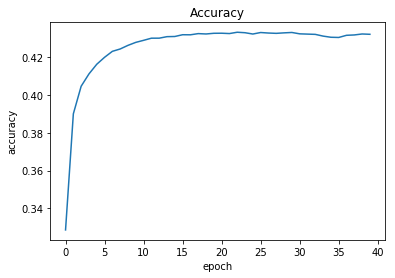

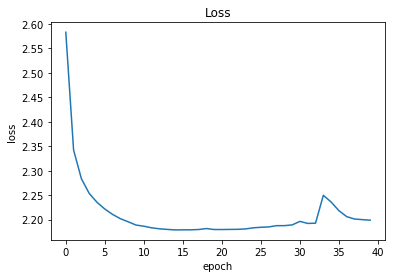

In [31]:
import matplotlib.pyplot as plt
import pickle

with open("text_generation_history", 'rb') as hist_file:
    history = pickle.load(hist_file)
    
plt.plot(history['acc'])# Entwicklung der Accuracy)
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# TODO Loss plotten
plt.plot(history['loss'])# Entwicklung der Accuracy)
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
